In [ ]:
# https://scikit-learn.org/stable/modules/multiclass.html

In [3]:
# Import libraries
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import requests
import matplotlib.pyplot as plt
import json
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [4]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# # Read csv and create dataframe
# from google.colab import files
# uploaded = files.upload()

In [32]:
# from google.colab import files
# uploaded = files.upload()

Saving salaries_cleaned.csv to salaries_cleaned (1).csv


In [89]:
import io
salaries_df = pd.read_csv('salaries_cleaned.csv')

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [91]:
salaries_df.head()

,Unnamed: 0,timestamp,date,company,level,title,totalyearlycompensation,location,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,0,2017-06-07 11:33:00,2017-06-07 00:00:00,Oracle,L3,Product Manager,127000,"Redwood City, CA",37.486324,-122.232523,1.5,1.5,107000,20000,10000,Unknown,Unknown,Unknown
1,1,2017-06-10 17:11:00,2017-06-10 00:00:00,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",37.779026,-122.419906,5.0,3.0,0,0,0,Unknown,Unknown,Unknown
2,2,2017-06-11 14:53:00,2017-06-11 00:00:00,Amazon,L7,Product Manager,310000,"Seattle, WA",47.603832,-122.330062,8.0,0.0,155000,0,0,Unknown,Unknown,Unknown
3,3,2017-06-17 00:23:00,2017-06-17 00:00:00,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",37.368830,-122.036349,7.0,5.0,157000,180000,35000,Unknown,Unknown,Unknown
4,4,2017-06-20 10:58:00,2017-06-20 00:00:00,Microsoft,60,Software Engineer,157000,"Mountain View, CA",37.389389,-122.083210,5.0,3.0,0,0,0,Unknown,Unknown,Unknown


In [92]:
salaries_df.columns

Index(['Unnamed: 0', 'timestamp', 'date', 'company', 'level', 'title',
       'totalyearlycompensation', 'location', 'latitude', 'longitude',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

,title
Human Resources,364
Recruiter,451
Sales,461
Mechanical Engineer,490
Marketing,710
Business Analyst,885
Management Consultant,976
Solution Architect,1157
Technical Program Manager,1381
Product Designer,1516


In [93]:
salaries_df['company'].value_counts()

Amazon                      8126
Microsoft                   5216
Google                      4330
Facebook                    2990
Apple                       2028
                            ... 
Samsung research America       1
Bny Mellon                     1
yelp                           1
Bloomberg lp                   1
tableau software               1
Name: company, Length: 1631, dtype: int64

In [94]:
val=salaries_df['company'].value_counts()
print(val[val>25])

Amazon           8126
Microsoft        5216
Google           4330
Facebook         2990
Apple            2028
                 ... 
TSMC               26
Huawei             26
Gojek Tech         26
Fortinet           26
Credit Suisse      26
Name: company, Length: 259, dtype: int64


In [95]:
#companies over 25 jobs
comapanies_to_replace=[]
company=salaries_df['company'].value_counts()
company=pd.DataFrame(company)
company.head(20)

,company
Amazon,8126
Microsoft,5216
Google,4330
Facebook,2990
Apple,2028
Oracle,1128
Salesforce,1056
Intel,949
Cisco,907
IBM,907


In [96]:
comapanies_to_replace.append(company[company.company<15].index)

AttributeError: 'list' object has no attribute 'value_counts'

In [97]:
#Replaced with other for all companies besides the top 20
for x in comapanies_to_replace:
    salaries_df['company'] = salaries_df['company'].replace(x,"Other")
    
# Check to make sure binning was successful
salaries_df['company'].value_counts()

Amazon         8126
Other          6259
Microsoft      5216
Google         4330
Facebook       2990
               ... 
LendingClub      15
Bosch            15
Cadence          15
Freshworks       15
BAE Systems      15
Name: company, Length: 393, dtype: int64

In [98]:
year_df=salaries_df['date'].str.split('-', expand=True)

In [99]:
salaries_df['date']=year_df[0]

In [100]:
salaries_df['month']=year_df[1]

In [101]:
salaries_df

,Unnamed: 0,timestamp,date,company,level,title,totalyearlycompensation,location,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education,month
0,0,2017-06-07 11:33:00,2017,Oracle,L3,Product Manager,127000,"Redwood City, CA",37.486324,-122.232523,1.5,1.5,107000,20000,10000,Unknown,Unknown,Unknown,06
1,1,2017-06-10 17:11:00,2017,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",37.779026,-122.419906,5.0,3.0,0,0,0,Unknown,Unknown,Unknown,06
2,2,2017-06-11 14:53:00,2017,Amazon,L7,Product Manager,310000,"Seattle, WA",47.603832,-122.330062,8.0,0.0,155000,0,0,Unknown,Unknown,Unknown,06
3,3,2017-06-17 00:23:00,2017,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",37.368830,-122.036349,7.0,5.0,157000,180000,35000,Unknown,Unknown,Unknown,06
4,4,2017-06-20 10:58:00,2017,Microsoft,60,Software Engineer,157000,"Mountain View, CA",37.389389,-122.083210,5.0,3.0,0,0,0,Unknown,Unknown,Unknown,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,62637,2018-09-09 11:52:00,2018,Google,T4,Software Engineer,327000,"Seattle, WA",47.603832,-122.330062,10.0,1.0,155000,150000,22000,Unknown,Unknown,Unknown,09
62638,62638,2018-09-13 08:23:00,2018,Microsoft,62,Software Engineer,237000,"Redmond, WA",47.669414,-122.123877,2.0,2.0,146900,73200,16000,Unknown,Unknown,Unknown,09
62639,62639,2018-09-13 14:35:00,2018,Other,63,Software Engineer,220000,"Seattle, WA",47.603832,-122.330062,14.0,12.0,157000,25000,20000,Unknown,Unknown,Unknown,09
62640,62640,2018-09-16 16:10:00,2018,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",37.779026,-122.419906,8.0,4.0,194688,57000,29000,Unknown,Unknown,Unknown,09


In [103]:
salaries_df['level'].value_counts()

L4                              5014
L5                              4871
L3                              3337
L6                              2871
Senior Software Engineer        1443
                                ... 
Gr 7                               1
Senior BA                          1
Consulting Analyst                 1
Senior Technical Director II       1
Bioinformatics Scientist II        1
Name: level, Length: 2916, dtype: int64

In [104]:
#companies over 25 jobs
levels_to_replace=[]
levels=salaries_df['level'].value_counts()
levels=pd.DataFrame(levels)
levels.head(20)

,level
L4,5014
L5,4871
L3,3337
L6,2871
Senior Software Engineer,1443
L2,1163
Senior,1079
L7,919
L1,765
62,764


In [105]:
levels_to_replace.append(levels[levels.level<15].index)

In [106]:
for x in levels_to_replace:
    salaries_df['level'] = salaries_df['level'].replace(x,"Other")
    
# Check to make sure binning was successful
salaries_df['level'].value_counts()

Other                            5668
L4                               5014
L5                               4871
L3                               3337
L6                               2871
                                 ... 
New grad                           15
Engineer I                         15
Only one level across Netflix      15
Grade 14                           15
PR3                                15
Name: level, Length: 326, dtype: int64

In [107]:
reduced_df = salaries_df[[ 'company', 'date', 'title', 'totalyearlycompensation', 'gender', 'level',
       'yearsofexperience', 'yearsatcompany', 'latitude', 'longitude', 'month', 'bonus', 'stockgrantvalue']]

In [108]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62637 non-null  object 
 1   date                     62642 non-null  object 
 2   title                    62642 non-null  object 
 3   totalyearlycompensation  62642 non-null  int64  
 4   gender                   62642 non-null  object 
 5   level                    62523 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   latitude                 62642 non-null  float64
 9   longitude                62642 non-null  float64
 10  month                    62642 non-null  object 
 11  bonus                    62642 non-null  int64  
 12  stockgrantvalue          62642 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 6.2+ MB


In [109]:
reduced_df


,company,date,title,totalyearlycompensation,gender,level,yearsofexperience,yearsatcompany,latitude,longitude,month,bonus,stockgrantvalue
0,Oracle,2017,Product Manager,127000,Unknown,L3,1.5,1.5,37.486324,-122.232523,06,10000,20000
1,eBay,2017,Software Engineer,100000,Unknown,SE 2,5.0,3.0,37.779026,-122.419906,06,0,0
2,Amazon,2017,Product Manager,310000,Unknown,L7,8.0,0.0,47.603832,-122.330062,06,0,0
3,Apple,2017,Software Engineering Manager,372000,Unknown,M1,7.0,5.0,37.368830,-122.036349,06,35000,180000
4,Microsoft,2017,Software Engineer,157000,Unknown,60,5.0,3.0,37.389389,-122.083210,06,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,2018,Software Engineer,327000,Unknown,T4,10.0,1.0,47.603832,-122.330062,09,22000,150000
62638,Microsoft,2018,Software Engineer,237000,Unknown,62,2.0,2.0,47.669414,-122.123877,09,16000,73200
62639,Other,2018,Software Engineer,220000,Unknown,63,14.0,12.0,47.603832,-122.330062,09,20000,25000
62640,Salesforce,2018,Software Engineer,280000,Unknown,Lead MTS,8.0,4.0,37.779026,-122.419906,09,29000,57000


In [111]:
reduced_df['date']=reduced_df['date'].astype(int)

In [112]:
reduced_df['month']=reduced_df['month'].astype(int)


In [113]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62637 non-null  object 
 1   date                     62642 non-null  int32  
 2   title                    62642 non-null  object 
 3   totalyearlycompensation  62642 non-null  int64  
 4   gender                   62642 non-null  object 
 5   level                    62523 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   latitude                 62642 non-null  float64
 9   longitude                62642 non-null  float64
 10  month                    62642 non-null  int32  
 11  bonus                    62642 non-null  int64  
 12  stockgrantvalue          62642 non-null  int64  
dtypes: float64(4), int32(2), int64(3), object(4)
memory usage: 5.7+ MB


In [43]:
dummies_df = pd.get_dummies(reduced_df)
dummies_df.head()

,date,totalyearlycompensation,yearsofexperience,yearsatcompany,latitude,longitude,month,bonus,stockgrantvalue,company_3M,...,level_Technical Leader 2,level_VP,level_Vice President,level_l1,level_l2,level_l3,level_l4,level_l5,level_l6,level_senior
0,2017,127000,1.5,1.5,37.486324,-122.232523,6,10000,20000,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,100000,5.0,3.0,37.779026,-122.419906,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,310000,8.0,0.0,47.603832,-122.330062,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,372000,7.0,5.0,37.368830,-122.036349,6,35000,180000,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,157000,5.0,3.0,37.389389,-122.083210,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
dummies_df.columns

Index(['date', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'latitude', 'longitude', 'month', 'bonus',
       'stockgrantvalue', 'company_3M',
       ...
       'level_Technical Leader 2', 'level_VP', 'level_Vice President',
       'level_l1', 'level_l2', 'level_l3', 'level_l4', 'level_l5', 'level_l6',
       'level_senior'],
      dtype='object', length=747)

In [45]:
# Split our preprocessed data into our features and target arrays
X = dummies_df.drop(columns=["totalyearlycompensation"]).values
y = dummies_df["totalyearlycompensation"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# # Split our preprocessed data into our features and target arrays
# X = reduced_df.drop(columns=["totalyearlycompensation"]).values
# y = reduced_df["totalyearlycompensation"].values

# # Split the preprocessed data into a training and testing dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [46]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X.shape

(62642, 1648)

In [47]:
#linear regression
# Import required libraries
import numpy as np
import pandas as pd

from pathlib import Path
from sklearn.linear_model import LinearRegression

In [ ]:
#model = LinearRegression()

In [ ]:
#y = dummies_df["totalyearlycompensation"].values


In [48]:
#random forest
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [28]:
#https://stackoverflow.com/questions/52648383/how-to-get-coefficients-and-feature-importances-from-multioutputregressor
#rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=500, random_state=78, max_depth=20))

In [49]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=78, max_depth=20, n_jobs=-1, verbose=3, oob_score=True)
#rf_model = RandomForestRegressor(n_estimators=500, random_state=7, max_depth=10)

In [50]:
rf_model = rf_model.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.7s


building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.3min


building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  5.4min


building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.9min finished


In [32]:
predictions = rf_model.predict(X_test_scaled)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.1s finished


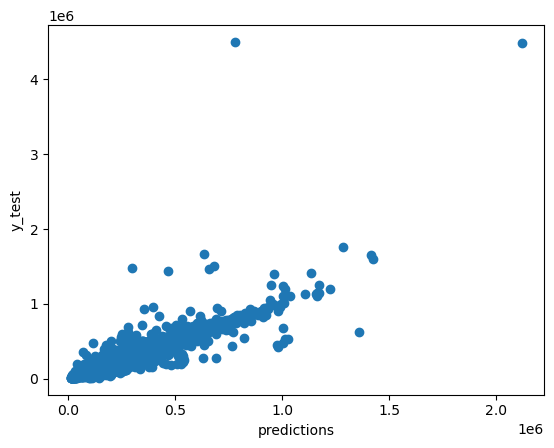

In [33]:
plt.scatter( predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("y_test")
plt.show()

In [51]:
acc_score = rf_model.score(X_test_scaled, y_test)
acc_score
#0.7402413883001011 with bonus
#0.8639637152876211 with stock
#0.8624360180973771 when year and months are intergers not string

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.1s finished


0.8624360180973771

In [48]:
import pickle
#save model
s = pickle.dumps(rf_model)
#load model
clf2 = pickle.loads(s)


In [37]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62637 non-null  object 
 1   date                     62642 non-null  object 
 2   title                    62642 non-null  object 
 3   totalyearlycompensation  62642 non-null  int64  
 4   gender                   62642 non-null  object 
 5   level                    62523 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   latitude                 62642 non-null  float64
 9   longitude                62642 non-null  float64
 10  month                    62642 non-null  object 
 11  bonus                    62642 non-null  int64  
 12  stockgrantvalue          62642 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 6.2+ MB


In [ ]:
#reduced_df = salaries_df[[ 'company', 'date', 'title', 'totalyearlycompensation', 'gender', 'level',
       #'yearsofexperience', 'yearsatcompany', 'latitude', 'longitude', 'month', 'bonus', 'stockgrantvalue']]
reduced_df_input_example = [ 'Amazon', 2018, 'Sofeware Engineer',  'Male', 'L4',
       0, 0, 47.603832, -122.330062, 03, 0, 0]]

In [50]:
# have to run inputs throught get dummies_df, maybe set all 700+ values to zero and then just change individual values based on the input
#maybe do throught for loop 
#scales the data
#then take the scaled inputs 

In [164]:
dummies_df_columns_list=list(dummies_df.columns)

In [165]:
blank_dummies_df=pd.DataFrame(dummies_df_columns_list)
blank_dummies_df[1]=0

#https://stackoverflow.com/questions/31658183/how-to-switch-columns-rows-in-a-pandas-dataframe (transpose columns)
blank_dummies_df=blank_dummies_df.T
# rename comulns
#https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
blank_dummies_df=blank_dummies_df.set_axis([dummies_df_columns_list], axis=1, inplace=False)
#drop row with columns names
blank_dummies_df=blank_dummies_df.drop([0])
blank_dummies_df=blank_dummies_df.drop(columns=["totalyearlycompensation"])
blank_dummies_df

,date,yearsofexperience,yearsatcompany,latitude,longitude,month,bonus,stockgrantvalue,company_3M,company_ADP,...,level_Technical Leader 2,level_VP,level_Vice President,level_l1,level_l2,level_l3,level_l4,level_l5,level_l6,level_senior
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
reduced_df_input_example = [ 'Amazon', 2018, 'Sofeware Engineer',  'Male', 'L4',
       0, 0, 47.603832, -122.330062, 3, 0, 0]

In [167]:
input_year=2018
blank_dummies_df['date'] = input_year

In [168]:
input_year_experience=0
blank_dummies_df['yearsofexperience'] = input_year_experience

In [169]:
input_year_at_company=0
blank_dummies_df['yearsatcompany'] = input_year_at_company

In [170]:
input_latitude=47.603832
blank_dummies_df['latitude'] = input_latitude

In [171]:
input_longitude=-122.330062
blank_dummies_df['longitude'] = input_longitude

In [172]:
input_month=3
blank_dummies_df['month'] =input_month

In [173]:
input_bonus=0
blank_dummies_df['bonus'] =input_bonus

In [174]:
input_stock=0
blank_dummies_df['stockgrantvalue'] =input_stock

In [175]:
input_company=['Amazon']

In [176]:
#top 20 companies and other 
for x in input_company:
    if x =='Amazon':
        blank_dummies_df['company_Amazon'] = 1
    elif x=='Apple':
        blank_dummies_df['company_Apple'] = 1
    elif x=='Bloomberg':
        blank_dummies_df['company_Bloomberg'] = 1
    elif x=='Capital One':
        blank_dummies_df['company_Capital One'] = 1
    elif x=='Cisco':
        blank_dummies_df['company_Cisco'] = 1
    elif x=='Facebook':
        blank_dummies_df['company_Facebook'] = 1
    elif x=='Goldman Sachs':
        blank_dummies_df['company_Goldman Sachs'] = 1
    elif x=='Google':
        blank_dummies_df['company_Google'] = 1
    elif x=='IBM':
        blank_dummies_df['company_IBM'] = 1
    elif x=='Intel':
        blank_dummies_df['company_Intel'] = 1
    elif x=='Intuit':
        blank_dummies_df['company_Intuit'] = 1
    elif x=='JPMorgan Chase':
        blank_dummies_df['company_JPMorgan Chase'] = 1
    elif x=='LinkedIn':
        blank_dummies_df['company_LinkedIn'] = 1
    elif x=='Microsoft':
        blank_dummies_df['company_Microsoft'] = 1
    elif x=='Oracle':
        blank_dummies_df['company_Oracle'] = 1
    elif x=='PayPal':
        blank_dummies_df['company_PayPal'] = 1
    elif x=='Qualcomm':
        blank_dummies_df['company_Qualcomm'] = 1
    elif x=='Salesforce':
        blank_dummies_df['company_Salesforce'] = 1
    elif x=='Uber':
        blank_dummies_df['company_Uber'] = 1
    elif x=='VMware':
        blank_dummies_df['company_VMware'] = 1
    elif x=='Other':
        blank_dummies_df['company_Other'] = 1
    else: 
        print("Company not found")
    

In [177]:
input_title=['Data Scientist']

In [178]:
for x in input_title:
    if x =='Business Analyst':
        blank_dummies_df['title_Business Analyst'] = 1
    elif x=='Data Scientist':
        blank_dummies_df['title_Data Scientist'] = 1
    elif x=='Hardware Engineer':
        blank_dummies_df['title_Hardware Engineer'] = 1
    elif x=='Human Resources':
        blank_dummies_df['title_Human Resources'] = 1
    elif x=='Management Consultant':
        blank_dummies_df['title_Management Consultant'] = 1
    elif x=='Marketing':
        blank_dummies_df['title_Marketing'] = 1
    elif x=='Mechanical Engineer':
        blank_dummies_df['title_Mechanical Engineer'] = 1
    elif x=='Product Designer':
        blank_dummies_df['title_Product Designer'] = 1
    elif x=='Product Manager':
        blank_dummies_df['title_Product Manager'] = 1
    elif x=='Recruiter':
        blank_dummies_df['title_Recruiter'] = 1
    elif x=='Sales':
        blank_dummies_df['title_Sales'] = 1
    elif x=='Software Engineer':
        blank_dummies_df['title_Software Engineer'] = 1
    elif x=='Software Engineering Manager':
        blank_dummies_df['title_Software Engineering Manager'] = 1
    elif x=='Solution Architect':
        blank_dummies_df['title_Solution Architect'] = 1
    elif x=='Technical Program Manager':
        blank_dummies_df['title_Technical Program Manager'] = 1
    else: 
        print("Title not found")
    

In [179]:
input_gender=["Unknown"]

In [180]:
for x in input_gender:
    if x =='Female':
        blank_dummies_df['gender_Female'] = 1
    elif x=='Male':
        blank_dummies_df['gender_Male'] = 1
    elif x=='Other':
        blank_dummies_df['gender_Other'] = 1
    elif x=='Unknown':
        blank_dummies_df['gender_Unknown'] = 1
    else: 
        print("Input not found")

In [181]:
#levels with over 100 responses and other
input_level=["Other"]

In [182]:
for x in input_level:
    if x =='1':
        blank_dummies_df['level_1'] = 1
    elif x=='2':
        blank_dummies_df['level_2'] = 1
    elif x=='3':
        blank_dummies_df['level_3'] = 1
    elif x=='4':
        blank_dummies_df['level_4'] = 1
    elif x=='5':
        blank_dummies_df['level_5'] = 1
    elif x=='6':
        blank_dummies_df['level_6'] = 1
    elif x=='7':
        blank_dummies_df['level_7'] = 1
    elif x=='9':
        blank_dummies_df['level_9'] = 1
    elif x=='8':
        blank_dummies_df['level_8'] = 1
    elif x=='59':
        blank_dummies_df['level_59'] = 1
    elif x=='60':
        blank_dummies_df['level_60'] = 1
    elif x=='61':
        blank_dummies_df['level_61'] = 1
    elif x=='62':
        blank_dummies_df['level_62'] = 1
    elif x=='63':
        blank_dummies_df['level_63'] = 1
    elif x=='64':
        blank_dummies_df['level_64'] = 1
    elif x=='65':
        blank_dummies_df['level_65'] = 1
    elif x=='66':
        blank_dummies_df['level_66'] = 1
    elif x=='67':
        blank_dummies_df['level_67'] = 1
    elif x=='Analyst':
        blank_dummies_df['level_Analyst'] = 1
    elif x=='Associate':
        blank_dummies_df['level_Associate'] = 1
    elif x=='Associate Software Eng':
        blank_dummies_df['level_Associate Software Eng'] = 1
    elif x=='Band 7':
        blank_dummies_df['level_Band 7'] = 1
    elif x=='Band 8':
        blank_dummies_df['level_Band 8'] = 1
    elif x=='Consultant':
        blank_dummies_df['level_Consultant'] = 1
    elif x=='Director':
        blank_dummies_df['level_Director'] = 1
    elif x=='E3':
        blank_dummies_df['level_E3'] = 1
    elif x=='E4':
        blank_dummies_df['level_E4'] = 1
    elif x=='E5':
        blank_dummies_df['level_E5'] = 1
    elif x=='E6':
        blank_dummies_df['level_E6'] = 1
    elif x=='Engineer':
        blank_dummies_df['level_Engineer'] = 1
    elif x=='Grade 10':
        blank_dummies_df['level_Grade 10'] = 1
    elif x=='Grade 6':
        blank_dummies_df['level_Grade 6'] = 1
    elif x=='Grade 7':
        blank_dummies_df['level_Grade 7'] = 1
    elif x=='Grade 8':
        blank_dummies_df['level_Grade 8'] = 1
    elif x=='Grade 9':
        blank_dummies_df['level_Grade 9'] = 1
    elif x=='IC1':
        blank_dummies_df['level_IC1'] = 1
    elif x=='IC2':
        blank_dummies_df['level_IC2'] = 1
    elif x=='IC-2':
        blank_dummies_df['level_IC-2'] = 1
    elif x=='IC3':
        blank_dummies_df['level_IC3'] = 1
    elif x=='IC-3':
        blank_dummies_df['level_IC-3'] = 1
    elif x=='IC4':
        blank_dummies_df['level_IC4'] = 1
    elif x=='IC-4':
        blank_dummies_df['level_IC-4'] = 1
    elif x=='IC5':
        blank_dummies_df['level_IC5'] = 1
    elif x=='IC6':
        blank_dummies_df['level_IC6'] = 1
    elif x=='ICT2':
        blank_dummies_df['level_ICT2'] = 1
    elif x=='ICT3':
        blank_dummies_df['level_ICT3'] = 1
    elif x=='ICT4':
        blank_dummies_df['level_ICT4'] = 1
    elif x=='ICT5':
        blank_dummies_df['level_ICT5'] = 1
    elif x=='L1':
        blank_dummies_df['level_L1'] = 1
    elif x=='L2':
        blank_dummies_df['level_L2'] = 1
    elif x=='L3':
        blank_dummies_df['level_L3'] = 1
    elif x=='L4':
        blank_dummies_df['level_4'] = 1
    elif x=='L5':
        blank_dummies_df['level_L5'] = 1
    elif x=='L5A':
        blank_dummies_df['level_L5A'] = 1
    elif x=='L6':
        blank_dummies_df['level_L6'] = 1
    elif x=='L6 SDM':
        blank_dummies_df['level_L6 SDM'] = 1
    elif x=='L7':
        blank_dummies_df['level_L7'] = 1
    elif x=='L8':
        blank_dummies_df['level_L8'] = 1
    elif x=='Lead MTS':
        blank_dummies_df['level_Lead MTS'] = 1
    elif x=='M1':
        blank_dummies_df['level_M1'] = 1
    elif x=='M2':
        blank_dummies_df['level_M2']=1
    elif x=='M3':
        blank_dummies_df['level_M3']= 1
    elif x=='M4':
        blank_dummies_df['level_M4']=1
    elif x=='Manager':
        blank_dummies_df['level_Manager'] = 1
    elif x=='MTS':
        blank_dummies_df['level_MTS'] = 1
    elif x=='MTS 2':
        blank_dummies_df['level_MTS 2'] = 1                         
    elif x=='MTS 3':
        blank_dummies_df['level_MTS 3'] = 1                         
    elif x=='P2':
        blank_dummies_df['level_P2'] = 1
    elif x=='P3':
        blank_dummies_df['level_P3'] = 1
    elif x=='P4':
        blank_dummies_df['level_P4'] = 1                         
    elif x=='P5':
        blank_dummies_df['level_P5'] = 1                         
    elif x=='Principal':
        blank_dummies_df['level_Principal'] = 1
    elif x=='Principal Associate':
        blank_dummies_df['level_Principal Associate'] = 1
    elif x=='Principal Engineer':
        blank_dummies_df['level_Principal Engineer'] = 1                         
    elif x=='Principal MTS':
        blank_dummies_df['level_Principal MTS'] = 1                         
    elif x=='SDE I':
        blank_dummies_df['level_SDE I'] = 1
    elif x=='SDE II':
        blank_dummies_df['level_SDE II'] = 1
    elif x=='SDE III':
        blank_dummies_df['level_SDE III'] = 1                         
    elif x=='Senior':
        blank_dummies_df['level_Senior'] = 1                         
    elif x=='Senior Associate':
        blank_dummies_df['level_Senior Associate'] = 1
    elif x=='Senior Consultant':
        blank_dummies_df['level_Senior Consultant'] = 1
    elif x=='Senior Engineer':
        blank_dummies_df['level_Senior Engineer'] = 1                         
    elif x=='Senior Manager':
        blank_dummies_df['level_Senior Manager'] = 1                         
    elif x=='Senior MTS':
        blank_dummies_df['level_Senior MTS'] = 1
    elif x=='Senior Product Manager':
        blank_dummies_df['level_Senior Product Manager'] = 1
    elif x=='Senior Software Engineer':
        blank_dummies_df['level_Senior Software Engineer'] = 1                         
    elif x=='Senior SWE':
        blank_dummies_df['level_Senior SWE'] = 1                                                                              
    elif x=='Software Engineer':
        blank_dummies_df['level_Software Engineer'] = 1
    elif x=='Software Engineer 1':
        blank_dummies_df['level_Software Engineer 1'] = 1
    elif x=='Software Engineer 2':
        blank_dummies_df['level_Software Engineer 2'] = 1                         
    elif x=='Software Engineer 3':
        blank_dummies_df['level_Software Engineer 3'] = 1                         
    elif x=='Software Engineer I':
        blank_dummies_df['level_Software Engineer I'] = 1
    elif x=='Software Engineer II':
        blank_dummies_df['level_Software Engineer II'] = 1
    elif x=='Staff':
        blank_dummies_df['level_Staff'] = 1                         
    elif x=='Staff Engineer':
        blank_dummies_df['level_Staff Engineer'] = 1                         
    elif x=='Staff Software Engineer':
        blank_dummies_df['level_Staff Software Engineer'] = 1
    elif x=='SWE II':
        blank_dummies_df['level_SWE II'] = 1
    elif x=='T2':
        blank_dummies_df['level_T2'] = 1                         
    elif x=='T3':
        blank_dummies_df['level_T3'] = 1      
    elif x=='T4':
        blank_dummies_df['level_T4'] = 1
    elif x=='T5':
        blank_dummies_df['level_T5'] = 1
    elif x=='Vice President':
        blank_dummies_df['level_Vice President'] = 1                         
    elif x=='Other':
        blank_dummies_df['level_Other'] = 1                         
    else: 
        print("Level not found")
    

In [183]:
blank_dummies_df

,date,yearsofexperience,yearsatcompany,latitude,longitude,month,bonus,stockgrantvalue,company_3M,company_ADP,...,level_Technical Leader 2,level_VP,level_Vice President,level_l1,level_l2,level_l3,level_l4,level_l5,level_l6,level_senior
1,2018,0,0,47.603832,-122.330062,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
#scale the input data
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_input_scaler = scaler.fit(blank_dummies_df)

# Scale the data
X_input_test_scaled = X_input_scaler.transform(blank_dummies_df)


In [186]:
prediction_output = rf_model.predict(X_input_test_scaled)
prediction_output

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.3s finished


array([219029.65232011])